<br>
<div align="center"><span style="font-size:32px;color:darkblue">TP 2 Classification</span></div><br><br>


On reprend les mêmes données qu'au premier TP. On cherche à faire une classification de nos années en groupes *homogènes* partageant des propriétés similaires, et ce à partir des informations apportées par les variables.

<span>&#9757;</span> On commence par importer nos packages préférés `pandas` et `numpy`.

puis importer nos données et vérifier la taille:

In [1]:
import pandas as pd
import numpy as np 

In [2]:
X = pd.read_excel("budgets.xls",sheet_name=0,header=0,index_col=0)
X

,PVP,AGR,CMI,TRA,LOG,EDU,ACS,ANC,DEF,DET,DIV
AN,,,,,,,,,,,
1872,18.0,0.5,0.1,6.7,0.5,2.1,2.0,0.0,26.4,41.5,2.1
1880,14.1,0.8,0.1,15.3,1.9,3.7,0.5,0.0,29.8,31.3,2.5
1890,13.6,0.7,0.7,6.8,0.6,7.1,0.7,0.0,33.8,34.4,1.7
1900,14.3,1.7,1.7,6.9,1.2,7.4,0.8,0.0,37.7,26.2,2.2
1903,10.3,1.5,0.4,9.3,0.6,8.5,0.9,0.0,38.4,27.2,3.0
1906,13.4,1.4,0.5,8.1,0.7,8.6,1.8,0.0,38.5,25.3,1.9
1909,13.5,1.1,0.5,9.0,0.6,9.0,3.4,0.0,36.8,23.5,2.6
1912,12.9,1.4,0.3,9.4,0.6,9.3,4.3,0.0,41.1,19.4,1.3
1920,12.3,0.3,0.1,11.9,2.4,3.7,1.7,1.9,42.4,23.1,0.2


In [3]:
n,p=X.shape
n,p

(24, 11)

Comme pour l'ACP, on s'intéresse à la distance entre les différents individus. Plutôt que de recoder notre fonction distance, on peut en utiliser une déjà présente dans un des packages de maths de python: `scipy`

In [4]:
from scipy.spatial.distance import pdist

In [5]:
Distance=pdist(X)

Attention, le résultat n'est pas évident à lire: le résultat en sortie est une liste (tableau à 1 dimension) qui a collecté colonne par colonne les distances entre individus. Sous cette forme il est difficile d'extraire les informations d'individus proches etc...

In [6]:
pd.DataFrame(Distance)

,0
0,14.553007
1,12.320714
2,20.237095
3,21.415415
4,21.801605
...,...
271,8.380931
272,10.912836
273,4.474371
274,6.809552


# Classification ascendante hierarchique

On s'interesse ensuite à l'algorithme de **classification ascendante hierarchique** vu en cours:
- On réunit d'abord les individus les plus proches
- Puis on calcule les distances entre les différents classes (grâce à la distance de Ward par exemple mais on peut le faire avec d'autres distances)
- Puis on réunit les classes qui sont les plus proches selon cette distance...

Pour cela, on utilise la fonction `linkage` du module `cluster.hierarchy` de `scipy` en lui précisant la distance utilisée initiallement entre les points (`euclidean`) et la distance utilisée entre les classes (`ward`): 
- Cette fonction prend en entrée soit le tableau individus $\times$ variables soit la liste des distances précédemment calculées.
- Cette fonction renvoie un tableau Z de taille $(n-1) \times 4$ où chaque ligne $i$ représente une étape de l'algorithme. Initiallement, les individus forment chacun une classe numérotée de $0$ à $n-1$.
- A l'étape/ligne i, on a donc 4 informations: Les 2 individus Z[i,0] et Z[i,1] que l'on va réunir, leur distance Z[i,2] et La taille Z[i,3] de la nouvelle classe obtenue après cette réunion. Cette nouvelle classe est numérotée $n+i$. 

Vous pouvez consulter la doc: https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html

In [7]:
from scipy.cluster.hierarchy import linkage

In [8]:
#générer la matrice des liens
Z = linkage(X, method = "ward", metric = "euclidean")
Z

array([[ 3.        ,  5.        ,  2.83019434,  2.        ],
       [21.        , 22.        ,  4.47437146,  2.        ],
       [ 6.        , 24.        ,  4.54935893,  3.        ],
       [12.        , 13.        ,  5.09215082,  2.        ],
       [18.        , 19.        ,  5.38702144,  2.        ],
       [ 4.        , 26.        ,  5.61189213,  4.        ],
       [23.        , 25.        ,  7.43281015,  3.        ],
       [20.        , 28.        ,  7.65114371,  3.        ],
       [ 7.        , 14.        ,  7.91580697,  2.        ],
       [15.        , 17.        ,  8.12219182,  2.        ],
       [11.        , 27.        ,  9.96075633,  3.        ],
       [ 1.        ,  2.        , 10.60235823,  2.        ],
       [ 8.        , 32.        , 10.85817664,  3.        ],
       [ 9.        , 10.        , 12.17743815,  2.        ],
       [ 0.        , 35.        , 14.3151435 ,  3.        ],
       [29.        , 36.        , 14.32280898,  7.        ],
       [31.        , 33.

<span>&#9999;</span> En regardant Z, répondez aux questions suivantes:
- Quelles années sont regroupées à la première étape de l'algorithme? 

   **Les années 1900 et 1906**
    
- A quelle étape de l'algorithme ces deux années sont-elles regroupées avec d'autres?

     **A l'étape 2 ces individus sont regroupé avec l'individu 6 correspondant à l'année 1909**
     
- A quelle étape de l'algorithme voit-on apparaitre une classe contenant plus de 5 éléments?

     **A l'étape 15  de l'algorithme on vois apparaitre une classe à 7**
     
- A cette étape, quelle est la distance entre les 2 classes qu'on regroupe?

    **A cette étape la distance entre les deux classes qu'on regroupe est de 14.32280898**
    
- Quelle sera la hauteur de l'arbre?

    **La hauteur de l'arbre est 91.84642829**



<span>&#9757;</span> <span>&#9757;</span> Tracer la perte d'inertie inter de la classification.

Pour visualiser tout cela, on va dessiner le **dendrogramme** c'est-à-dire l'arbre hierarchique. On utilise la fonction `dendrogram` appliquée au tableau des *liens* précédemment calculée. 

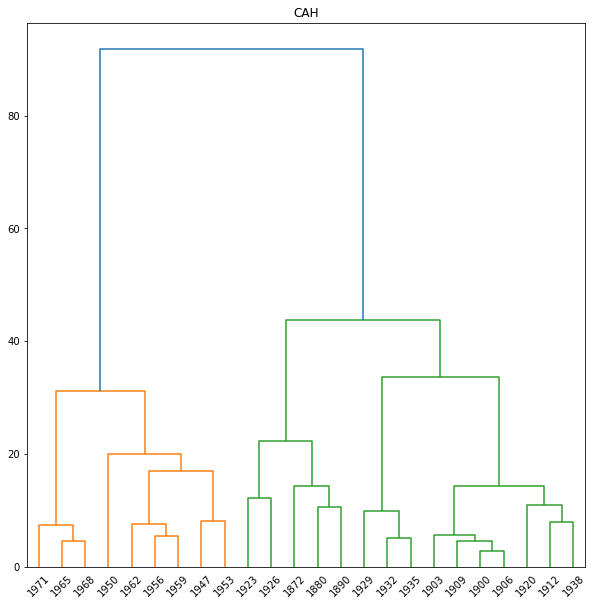

In [9]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram


fig = plt.figure(figsize=(10, 10))
plt.title("CAH")
dn = dendrogram(Z, labels = X.index)

Par défaut, la fonction `dendrogram` nous suggère 2 classes. On peut rajouter des options:
   - L'orientation 
   - La hauteur à partir de laquelle on souhaite *couper* l'arbre et faire des classes.

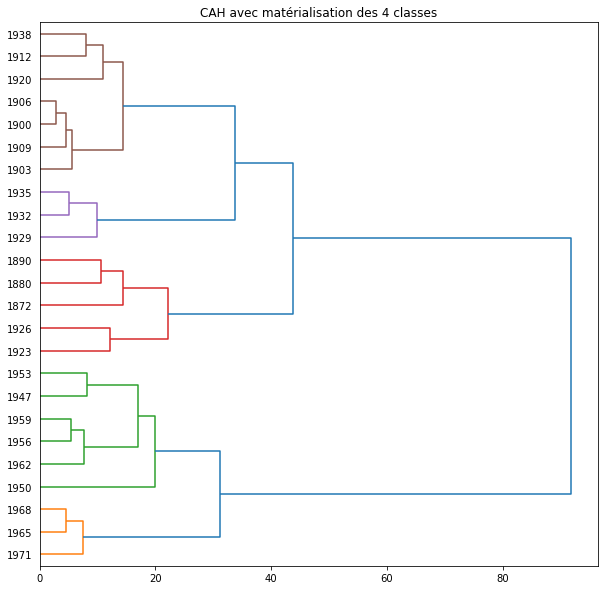

In [10]:
fig = plt.figure(figsize=(10, 10))
plt.title("CAH avec matérialisation des 4 classes")
dn = dendrogram(Z, labels = X.index, orientation = "right", color_threshold = 25)

Pour savoir à quelle classe appartient chaque individu, on utilise la fonction `fcluster`, en précisant:
- Le critère pour regrouper les individus (ici la distance)
- Le seuil t tel que dans une même classe (ou cluster) les individus soient à une distance inférieur à t.

In [11]:
from scipy.cluster.hierarchy import fcluster
groupes_cah5 = fcluster(Z, t = 25, criterion = "distance")
groupes_cah5

array([3, 3, 3, 5, 5, 5, 5, 5, 5, 3, 3, 4, 4, 4, 5, 2, 2, 2, 2, 2, 2, 1,
       1, 1], dtype=int32)

On range ensuite les individus par classes et on les affiche.



In [12]:
idg = np.argsort(groupes_cah5)
pd.DataFrame(X.index[idg], groupes_cah5[idg])


,AN
1,1971
1,1965
1,1968
2,1962
2,1959
2,1956
2,1953
2,1950
2,1947
3,1926


<span>&#9757;</span> Faire une autre partition mais en 2 classes seulement `groupes_cah2`

In [13]:
groupes_cah2 = fcluster(Z, t = 60, criterion = "distance")
groupes_cah2

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

In [14]:
idg2 = np.argsort(groupes_cah2)
pd.DataFrame(X.index[idg2], groupes_cah2[idg2])

,AN
1,1971
1,1965
1,1962
1,1959
1,1956
1,1953
1,1950
1,1947
1,1968
2,1938


<span>&#9757;</span> <span>&#9999;</span> Calculer les inerties inter-classes de ces 2 partitions. Commenter

In [15]:
#Partition 1(5 classes)

I_inter= 1/24*(91.84642829+ 43.80607264 + 33.66770673 + 31.2449107)

I_inter

8.356879931666665

In [16]:
#Partion 2(2 classes)

I_inter2=1/24*(91.84642829)
I_inter2

3.8269345120833336

<span>&#9757;</span> Faire une autre classification basée sur une autre distance de votre choix.

<span>&#9999;</span> Comparer les deux classifications


In [17]:
I = linkage(X, method = "single", metric = "euclidean")
I

array([[ 3.        ,  5.        ,  2.83019434,  2.        ],
       [ 6.        , 24.        ,  3.20312348,  3.        ],
       [ 4.        , 25.        ,  4.09023227,  4.        ],
       [21.        , 22.        ,  4.47437146,  2.        ],
       [12.        , 13.        ,  5.09215082,  2.        ],
       [18.        , 19.        ,  5.38702144,  2.        ],
       [20.        , 29.        ,  5.41387107,  3.        ],
       [ 7.        , 26.        ,  6.20805928,  5.        ],
       [23.        , 27.        ,  6.80955211,  3.        ],
       [30.        , 32.        ,  7.55115885,  6.        ],
       [14.        , 31.        ,  7.91580697,  6.        ],
       [15.        , 17.        ,  8.12219182,  2.        ],
       [11.        , 28.        ,  8.29638475,  3.        ],
       [ 8.        , 34.        ,  8.33186654,  7.        ],
       [ 2.        , 37.        ,  9.25526877,  8.        ],
       [33.        , 35.        ,  9.40372267,  8.        ],
       [ 1.        , 38.

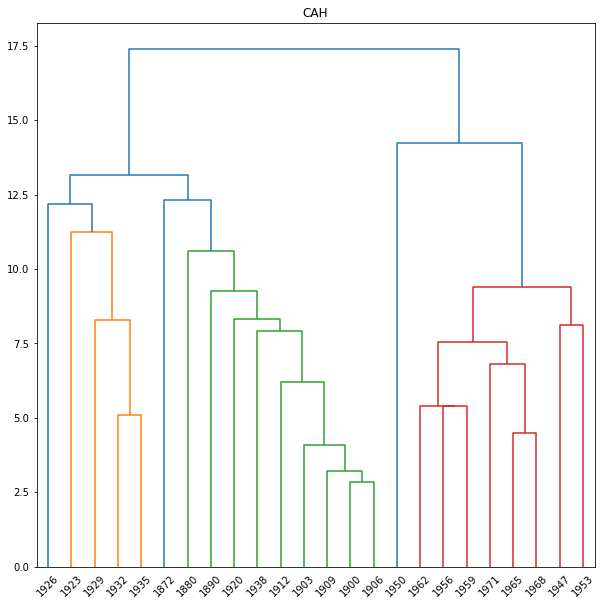

In [18]:
fig = plt.figure(figsize=(10, 10))
plt.title("CAH")
dn = dendrogram(I, labels = X.index)

In [19]:
groupes_cah3 = fcluster(I, t = 60, criterion = "distance")
groupes_cah3
idg3 = np.argsort(groupes_cah3)
pd.DataFrame(X.index[idg3], groupes_cah3[idg3])

,AN
1,1872
1,1965
1,1962
1,1959
1,1956
1,1953
1,1950
1,1947
1,1938
1,1935


 Comparer les deux classifications

**On constate que les deux classification donne à la fin deux partition de même individu**

# Kmeans

## Algorithme des K-means

On va maintenant utiliser l'algorithme des **K-means** du package`scikit-learn`. Une documentation se trouve par exemple là: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans. Pour cet algotithme:
- on doit préciser initialement le nombre de classes que l'on souhaite dans `n_clusters`
- on le fait ensuite tourner grâce à `.fit()` appliqué à notre tableau individus $\times$ variables.

In [20]:
from sklearn import cluster
kmeans5 = cluster.KMeans(n_clusters=5)
kmeans5.fit(X)

KMeans(n_clusters=5)

On extrait ensuite les informations qui nous interesent comme:
- les classes des invidus (`.labels_`)
- les centres des classes (`.cluster_centers_`)
- n fois l'inertie intra-classe (`inertia_`)

<span>&#9757;</span> Créer `groupes_km2` et `groupes_km5` qui donnent la liste des classes de chaque individus dans le cas de 2 et 5 classes.

In [21]:
groupes_km5= kmeans5.labels_
groupes_km5

array([4, 4, 4, 3, 3, 3, 3, 3, 3, 4, 4, 0, 0, 0, 3, 1, 1, 1, 1, 1, 2, 2,
       2, 2])

In [22]:
kmeans2 = cluster.KMeans(n_clusters=2)
kmeans2.fit(X)

KMeans(n_clusters=2)

In [23]:
groupes_km2= kmeans2.labels_
groupes_km2

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [24]:
print(groupes_km2)
print(groupes_km5)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0]
[4 4 4 3 3 3 3 3 3 4 4 0 0 0 3 1 1 1 1 1 2 2 2 2]


<span>&#9999;</span> Est-ce que les deux partitions sont emboitées (i.e. l'une est une sous-découpage de l'autre)?

**Oui les deux partitions sont bien emboité car les classes 0, 2 et 3 du groupe_km5 sont incluse dans la classe 0 du
groupe_km2 et 1 et 4 du du groupe_km5 sont incluse dans la classe 1 du groupe_km2**

<span>&#9757;</span> <span>&#9999;</span> Calculer les inerties inter-classes de ces 2 partitions. Commenter

In [25]:
Itotal= sum(np.var(X))
Itotal

310.57244791666665

In [26]:
##Partition groupes_km5
I_intraP1= (1/24)*kmeans5.inertia_
I_intraP1

49.39688591269843

In [27]:
I_interP1=Itotal-I_intraP1
I_interP1

261.1755620039682

In [28]:
##Partition groupes_km2
I_intraP2= (1/24)*kmeans2.inertia_
I_intraP2

134.8273148148148

In [29]:
I_interP2=Itotal-I_intraP2
I_interP2

175.74513310185185

**Commentaire**


<span>&#9757;</span> Comme précédemment, ranger les individus par classe puis les afficher.

In [30]:
idg5 = np.argsort(groupes_km5)
pd.DataFrame(X.index[idg5], groupes_km5[idg5])

,AN
0,1929
0,1935
0,1932
1,1959
1,1956
1,1953
1,1950
1,1947
2,1965
2,1962


In [31]:
idg22 = np.argsort(groupes_km2)
pd.DataFrame(X.index[idg22], groupes_km2[idg22])

,AN
0,1971
0,1965
0,1962
0,1959
0,1956
0,1953
0,1950
0,1947
0,1968
1,1938


## Comparaison des 2 algorithmes

Pour comparer les partitions (en 5 classes) obtenues par les 2 algorithmes, on peut calculer les correspondances entre les classes grâce à `crosstab`.

In [32]:
#correspondance avec les groupes de la CAH
pd.crosstab(groupes_cah5,groupes_km5)

col_0,0,1,2,3,4
row_0,,,,,
1,0,0,3,0,0
2,0,5,1,0,0
3,0,0,0,0,5
4,3,0,0,0,0
5,0,0,0,7,0


<span>&#9999;</span> Quelles sont les classes qui coincident parfaitement? Quels sont les éléments qui n'ont pas été classés de la même façon?

**Les classes qui coincident parfaitement sont:**

**la classe 3 du groupe_cah5 et la classe 2 du groupe_km5**

**les deux classes 4 des deux groupes**

**la classe 5 du groupe_cah5 et la classe 1 c'est à dire numero 0 du groupe_km5** 


<span>&#9757;</span> <span>&#9999;</span> Faire la même choses pour les partitions en 2 classes.

In [33]:
pd.crosstab(groupes_cah2,groupes_km2)

col_0,0,1
row_0,,
1,9,0
2,0,15


**Toutes les classes coincident parfaitement**

**La classe 1  du groupe_cah2 et la classe 0 du groupe_km2 coincident parfaitement**

**La classe 2  du groupe_cah2 et la classe 1 du groupe_km2 coincident parfaitement** 

# Caractérisation de la partition et de ses classes

Pour travailler avec les classes du jeu de données, on peut utiliser la fonction `groupby` de `pandas`.



In [34]:
G=X.groupby(kmeans5.labels_)
G.mean()

,PVP,AGR,CMI,TRA,LOG,EDU,ACS,ANC,DEF,DET,DIV
0,9.80,1.333333,0.766667,8.566667,1.800000,10.166667,5.266667,12.166667,28.233333,21.166667,0.80
1,12.74,2.820000,10.120000,9.000000,10.980000,9.380000,6.300000,4.060000,28.780000,5.540000,0.30
2,12.35,4.450000,8.125000,7.525000,5.450000,20.025000,10.575000,4.475000,20.775000,5.375000,0.95
3,12.40,1.214286,0.671429,8.642857,1.071429,8.000000,2.700000,1.114286,39.371429,23.271429,1.60
4,12.76,0.700000,0.900000,7.680000,1.080000,5.020000,1.420000,4.020000,27.780000,36.760000,1.90


statsDans cette partie on aura recours à des **tests statistiques**. On va utiliser pour cela la libraire `stats` de `scipy` ou bien le package `statsmodels`.

In [35]:
from scipy import stats
import statsmodels.api as sm

## Interprétation des classes grâce aux individus

On peut calculer les distances de chaque individu aux centres des classes grâce à la fonction `transform`, et ainsi déterminer les **parangons** des classes.

In [36]:
pd.DataFrame(kmeans5.transform(X), index=X.index)
np.amin(kmeans5.transform(X),axis=0)
np.argmin(kmeans5.transform(X),axis=0)

array([12, 18, 21,  5,  2], dtype=int64)

<span>&#9999;</span> Donner pour chacune des 5 classes le parangon.

**Le parangon de la classe 0 est: 5**

**Le parangon de la classe 1 est: 21**

**Le parangon de la classe 2 est: 2**

**Le parangon de la classe 3 est: 18**

**Le parangon de la classe 4 est: 12**

<span>&#9999;</span> <span>&#9757;</span> Faire la meme chose pour la CAH

In [37]:
pd.DataFrame(groupes_cah5.transform(X), index=X.index)
np.amin(groupes_cah5.transform(X),axis=0)
np.argmin(groupes_cah5.transform(X),axis=0)

AttributeError: 'numpy.ndarray' object has no attribute 'transform'

## Interprétation de la partition grâce aux variables

Pour vérifier si une variable quantitative influence la partition ou non, on va considérer la classe de chaque individu comme une variable qualitative et tester la liaision entre la variable qualitative la variable quantitive. Cette méthode est connue sous le nom de *ANOVA*, ou *analyse de la variance à 1 facteur*. Il s'agit de vérifier si on peut considérer les moyennes conditionnelles d'une variable sur chaque classe comme égales.

Soit X la variable, $\mu_i$ sa moyenne conditionnelle sur la classe $i$. On teste:

$$H_0=\{ \mu_1=\mu_2=\ldots=\mu_K\}$$ 

$$H_1=\{\text{il existe au moins une des $\mu_i$ qui diffère}\}$$

On commence donc par ajouter les classes comme une nouvelle variable de notre dataframe:


In [ ]:
X['cah5']=groupes_cah5

On utilise ensuite des modules de `statsmodels` pour faire le test. La sortie est très ressemblante à celle de R. On y retrouve notamment:
- La valeur de la statistique de test dans la colonne F
- La p-valeur dans la colonne PR(>F)

In [ ]:
import statsmodels.formula.api
import statsmodels.api 
fit = statsmodels.formula.api.ols('PVP ~ classe', data = X).fit()
table = statsmodels.api.stats.anova_lm(fit)
table

<span>&#9999;</span> Quelle est la conclusion de ce test?

On itère sur toutes les variables (mais on va perdre la belle présentation de DataFrame):

In [ ]:
for i,j in X.iteritems():
    print(i)
    fit = statsmodels.formula.api.ols('j ~ classe', data = X).fit()
    table = statsmodels.api.stats.anova_lm(fit)
    print(table)

<span>&#9999;</span> Quelles sont les variables qui expliquent significativement la partition?
    
On se demande alors quelles classes sont caractérisées par ces variables.

## Interprétation des classes grâce aux variables

Le but est de comparer, pour chaque variables et pour chaque classe, la moyenne de la variable sur la classe (dite *moyenne conditionnelle*) avec la moyenne sur tous les individus. S'il y a une différence significative, on conlue que la variable caractérise la classe. 

In [ ]:
pd.DataFrame(X.mean())


In [ ]:
X.groupby(kmeans.labels_).mean()


<span>&#9999;</span> A partir des observations précédentes, quelles variables vous paraissent expliquer la classe 0? la classe 1?

Pour vérifier si ces différences sont significatives, on a recours au test suivant:

Soit X la variable, $\mu$ sa moyenne et $\mu_k$ sa moyenne conditionnelle sur la classe $k$ (et $\sigma^2$ sa variance). On teste:

$$H_0=\{ \mu_k=\mu\}$$ 

$$H_1=\{\mu_k\neq \mu\}$$

Il ne s'agit pas d'un test de moyennes classiques (car on ne compare pas ni à une valeur théorique ni 2 valeurs observées sur échantillons indépendants). On effectue donc le test à la main avec la statistique de test suivante:

$$Z=\frac{\mu_k-\mu}{\sqrt{\frac{\sigma^2}{n_k}\frac{n-n_k}{n-1}}}\sim \mathcal{N}(0,1)$$

<span>&#9757;</span> Commencer par choisir une variable et une classe et effectuer ce test. Conclure

<span>&#9757;</span>  Faire une boucle pour itérer sur toutes les classes et toutes les variables.

<span>&#9999;</span> Quelles sont les variables qui expliquent quelles classes?

# Utilisation de l'ACP

On peut avoir recours à une ACP **avant** une classification lorsque le nombre de variables est trop important. Mais on peut aussi y avoir recours **après** pour aider à l'interprétation des classes en fonctions des variables (car l'étude précédente ne tenait pas compte des liaisons entre variables) ou tout simplement pour visualiser en 2 dimensions notre classification. L'ACP peut parfois permettre de mettre en évidence un groupe qui écrase l'information disponible, tasse les autres individus et masque des relations pouvant exister entre ceux-ci.

On effectue donc une ACP en ne gardant que les 2 premiers axes:

In [ ]:
from sklearn.decomposition import PCA
acp = PCA(n_components = 2).fit_transform(X)

Puis on colorie les points selon leurs classes dans la classification donnée par l'algo des K-means.

In [ ]:
#projeter dans le plan factoriel avec un code couleur différent selon le groupe
plt.figure(figsize =(10,10))
for couleur,k in zip(['red', 'blue', 'lawngreen', 'aqua','violet'],[0,1,2,3,4]):
    plt.scatter(acp[groupes_km5==k,0], acp[groupes_km5==k,1],c=couleur)
    
#mettre les labels des points
for i,label in enumerate(X.index):
    plt.annotate(label,(acp[i,0], acp[i,1]))

<span>&#9999;</span> A partir de cette illustration répondez aux questions suivantes:
- Pensez vous que certains points sont mal classés? Si oui, lesquels?
- Certaines classes peuvent-elles êtres caractérisées par les axes factoriels? Si oui, lesquels?

<span>&#9757;</span> Faire la même représentation avec les 5 classes de la CAH et répondre aux mêmes questions.

In [ ]:
#projeter dans le plan factoriel avec un code couleur différent selon le groupe
plt.figure(figsize =(10,10))
for couleur,k in zip(['red', 'blue', 'lawngreen', 'aqua','violet'],[0,1,2,3,4]):
    plt.scatter(acp[groupes_cah5==k,0], acp[groupes_cah5==k,1],c=couleur)
    
#mettre les labels des points
for i,label in enumerate(X.index):
    plt.annotate(label,(acp[i,0], acp[i,1]))

# Compléments 

Refaire ce travail de classification sur les données de votre choix.